### 데이터 불러오기(from 캐글)

In [1]:
!pip install kaggle --upgrade

In [2]:
from google.colab import files
files.upload()
# 파일 선택 버튼 클릭 후 kaggle.json 파일 업로드

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hndmin","key":"80da8ff6ae87346a8ee62230ce0033f0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!ls -1ha kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:24<00:00, 120MB/s]
100% 2.29G/2.29G [00:24<00:00, 100MB/s]


In [5]:
!unzip chest-xray-pneumonia.zip
!ls

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NO

### 데이터 로더 작성

In [6]:
"""
dataset/
|-- train/
|   |-- NORMAL/
|   |   |-- normal_image1.jpg
|   |   |-- normal_image2.jpg
|   |   |-- ...
|   |
|   |-- PNEUMONIA/
|       |-- pneumonia_image1.jpg
|       |-- pneumonia_image2.jpg
|       |-- ...
|
|-- val/
|   |-- NORMAL/
|   |   |-- ...
|   |
|   |-- PNEUMONIA/
|       |-- ...
|
|-- test/
|   |-- NORMAL/
|   |   |-- ...
|   |
|   |-- PNEUMONIA/
|       |-- ...

"""

'\ndataset/\n|-- train/\n|   |-- NORMAL/\n|   |   |-- normal_image1.jpg\n|   |   |-- normal_image2.jpg\n|   |   |-- ...\n|   |\n|   |-- PNEUMONIA/\n|       |-- pneumonia_image1.jpg\n|       |-- pneumonia_image2.jpg\n|       |-- ...\n|\n|-- val/\n|   |-- NORMAL/\n|   |   |-- ...\n|   |\n|   |-- PNEUMONIA/\n|       |-- ...\n|\n|-- test/\n|   |-- NORMAL/\n|   |   |-- ...\n|   |\n|   |-- PNEUMONIA/\n|       |-- ...\n\n'

In [7]:
import numpy as np

# 채널 별 mean 계산
def get_mean(dataset):
  meanRGB = [np.mean(image.numpy(), axis=(1,2)) for image,_ in dataset]
  meanR = np.mean([m[0] for m in meanRGB])
  meanG = np.mean([m[1] for m in meanRGB])
  meanB = np.mean([m[2] for m in meanRGB])
  return [meanR, meanG, meanB]

# 채널 별 str 계산
def get_std(dataset):
  stdRGB = [np.std(image.numpy(), axis=(1,2)) for image,_ in dataset]
  stdR = np.mean([s[0] for s in stdRGB])
  stdG = np.mean([s[1] for s in stdRGB])
  stdB = np.mean([s[2] for s in stdRGB])
  return [stdR, stdG, stdB]

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import torchvision.transforms as transforms

# 데이터셋 디렉토리 경로 설정
data_dir = "chest_xray/chest_xray"

transform = transforms.Compose([
    transforms.Resize(256),  # 큰 쪽을 256으로 resize
    transforms.CenterCrop(224),  # 중앙을 기준으로 224x224 크기로 자르기
    transforms.ToTensor(),
    # 추가적인 전처리를 여기에 추가할 수 있습니다.
])

# ImageFolder를 사용하여 데이터셋 생성
train_dataset = datasets.ImageFolder(root=data_dir + '/train', transform=transform)
val_dataset = datasets.ImageFolder(root=data_dir + '/val', transform=transform)
test_dataset = datasets.ImageFolder(root=data_dir + '/test', transform=transform)

# # 데이터 변환 및 전처리 정의
# train_transform = transforms.Compose([
#     transforms.Resize(256),  # 큰 쪽을 256으로 resize
#     transforms.CenterCrop(224),  # 중앙을 기준으로 224x224 크기로 자르기
#     transforms.ToTensor(),
#     # 추가적인 전처리를 여기에 추가할 수 있습니다.
#     transforms.Normalize(get_mean(train_dataset), get_std(train_dataset))
# ])

# val_transform = transforms.Compose([
#     transforms.Resize(256),  # 큰 쪽을 256으로 resize
#     transforms.CenterCrop(224),  # 중앙을 기준으로 224x224 크기로 자르기
#     transforms.ToTensor(),
#     # 추가적인 전처리를 여기에 추가할 수 있습니다.
#     transforms.Normalize(get_mean(val_dataset), get_std(val_dataset))
# ])

# test_transform = transforms.Compose([
#     transforms.Resize(256),  # 큰 쪽을 256으로 resize
#     transforms.CenterCrop(224),  # 중앙을 기준으로 224x224 크기로 자르기
#     transforms.ToTensor(),
#     # 추가적인 전처리를 여기에 추가할 수 있습니다.
#     transforms.Normalize(get_mean(test_dataset), get_std(test_dataset))
# ])

# train_dataset.transform = train_transform
# val_dataset.transform = val_transform
# test_dataset.transform = test_transform

# DataLoader 생성
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
print(train_dataset)
print(val_dataset)
print(test_dataset)

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: chest_xray/chest_xray/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 16
    Root location: chest_xray/chest_xray/val
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )
Dataset ImageFolder
    Number of datapoints: 624
    Root location: chest_xray/chest_xray/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=warn)
               CenterCrop(size=(224, 224))
               ToTensor()
           )


### 데이터 로더로 로딩된 이미지 시각화

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms

def imshow(img):
  img = img / 2 + 0.5
  np_img = img.numpy()
  plt.imshow(np.transpose(np_img, (1, 2, 0)))

  print(np_img.shape)
  print((np.transpose(np_img, (1, 2, 0))).shape)

tensor([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1])
(3, 1810, 906)
(1810, 906, 3)


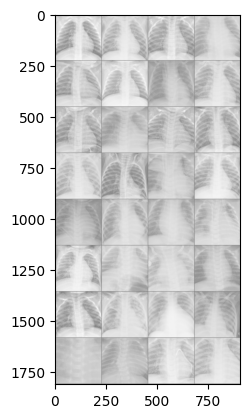

In [11]:
# train_iter = iter(train_loader)
# images, labels = train_iter.next()
# print(labels)

images, labels = next(iter(train_loader))
print(labels)

imshow(torchvision.utils.make_grid(images, nrow=4))

In [12]:
# plt.imshow(images[-1].permute(1, 2, 0).numpy())
# plt.show()

### 모델 불러오기

In [13]:
from torchvision import models
import torch

resnet50 = models.resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 133MB/s]


In [14]:
# from torchsummary import summary
# summary(resnet50, (3, 224, 224))

### 모델 튜닝

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [16]:
import torch
import torch.nn as nn
from torch import optim

# 모델의 마지막 FC 레이어를 이진 분류를 위한 레이어로 교체
in_features = resnet50.fc.in_features
resnet50.fc = nn.Linear(in_features, 1)  # 1은 이진 분류를 위한 클래스 수

# 편의를 위해서 이제 resnet50을 model이라고 부르겠음
model = resnet50

lr = 0.0001
num_epochs = 5
optimizer = optim.Adam(model.parameters(), lr=lr)

# to device
loss_function = nn.BCEWithLogitsLoss().to(device)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm

# 텐서보드 로그 경로 지정
log_dir = "logs"
writer = SummaryWriter(log_dir)

In [18]:
for epoch in range(num_epochs):
   # 훈련
    model.train()
    running_loss = 0.0
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels.float().view(-1, 1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}")

    # 텐서보드에 로그 기록
    writer.add_scalar("Loss/Train", average_loss, epoch+1)

    # 검증
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_function(outputs, labels.float().view(-1, 1))

            val_loss += loss.item()
            total += labels.size(0)
            predicted = (torch.sigmoid(outputs) >= 0.5).float()
            correct += (predicted == labels.float().view(-1, 1)).sum().item()

    average_val_loss = val_loss / len(val_loader)
    accuracy = correct / total

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {average_val_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# 테스트

# test
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        predicted = (torch.sigmoid(outputs) >= 0.5).float()

        test_total += labels.size(0)
        test_correct += (predicted == labels.float().view(-1, 1)).sum().item()

        # # 시각화
        # for i in range(len(images)):
        #     image = images[i].cpu().numpy().transpose((1, 2, 0))  # 이미지를 (H, W, C)로 변환
        #     label_true = labels[i].item()
        #     label_pred = predicted[i].item()

        #     plt.imshow(image)
        #     plt.title(f"True Label: {label_true}, Predicted Label: {label_pred}")
        #     plt.show()

test_accuracy = test_correct / test_total
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

torch.save(model.state_dict(), 'resnet50_finetuned.pth')

Epoch 1/5: 100%|██████████| 163/163 [02:39<00:00,  1.02it/s]


Epoch 1/5, Loss: 0.0990
Epoch 1/5, Loss: 0.9137, Accuracy: 62.50%


Epoch 2/5: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]


Epoch 2/5, Loss: 0.0313
Epoch 2/5, Loss: 0.3525, Accuracy: 81.25%


Epoch 3/5: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]


Epoch 3/5, Loss: 0.0248
Epoch 3/5, Loss: 0.6469, Accuracy: 68.75%


Epoch 4/5: 100%|██████████| 163/163 [02:19<00:00,  1.17it/s]


Epoch 4/5, Loss: 0.0116
Epoch 4/5, Loss: 0.1972, Accuracy: 93.75%


Epoch 5/5: 100%|██████████| 163/163 [02:18<00:00,  1.18it/s]


Epoch 5/5, Loss: 0.0130
Epoch 5/5, Loss: 0.1336, Accuracy: 93.75%
Test Accuracy: 87.66%


In [ ]:
# 모델 인스턴스 생성
loaded_model = models.resnet50(pretrained=False)

# 저장된 state_dict 불러오기
loaded_model.load_state_dict(torch.load('resnet50_finetuned.pth'))

# 모델을 평가 모드로 설정
loaded_model.eval()
